$\textbf{Preprocessing}$

In [1]:
import pandas as pd
import xlrd
import numpy as np

file = 'repetitors_1.xlsx'
df_first = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)

In [2]:
df_clean = df_first.drop(
    ['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink',
     'tutorname'], axis=1).dropna().copy()

In [3]:
df = df_first.copy()
df = df.drop(
    ['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink',
     'tutorname'], axis=1)

mark_dict = {
    'лучше не бывает!': 10,
    'отлично': 9,
    'почти отлично': 8,
    'вполне хорошо': 7,
    'хорошо': 6,
    'почти хорошо': 5,
    'более-менее': 4,
    'так себе...': 3,
    'плохо': 2,
    'ужасно': 1
}

df = df.replace({"mark": mark_dict}).dropna()
df.mark *= 70
discipline_dict = {}
index = 1
for discipline in df['discipline'].unique():
    discipline_dict[discipline] = index
    index += 1
df = df.replace({"discipline": discipline_dict})
df.discipline *= 10

$\textbf{BIRCH}$

In [4]:
from BIRCH import BIRCH
import pandas
brc = BIRCH(branching_factor=50, n_clusters=6, threshold=1.5)
X = df.values
labels_B = brc.get_labels(X)

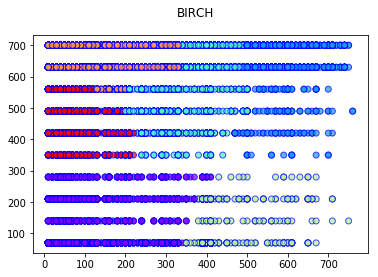

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.scatter(X[:,0], X[:,1], c=labels_B, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.suptitle('BIRCH')
plt.show()

In [6]:
df_Birch = df_clean.copy()
df_Birch["label"] = labels_B
df_Birch["value"] = [1 for i in range (df_Birch.shape[0])]

In [7]:
df_Birch.groupby(["discipline", "mark", "label"]).count()

value
discipline           mark             label       
РКИ                  более-менее      1          1
                     вполне хорошо    3          3
                     лучше не бывает! 3         68
                     отлично          3         50
                     почти отлично    3          6
                     так себе...      1          5
                     ужасно           3          2
                     хорошо           1          6
актерское мастерство вполне хорошо    3          6
                     лучше не бывает! 3        161
                     отлично          3         84
                     плохо            3          1
                     почти отлично    3          2
                     почти хорошо     3          1
                     так себе...      3          2
                     ужасно           3          3
                     хорошо           1          5
английский язык      более-менее      2         89
                     вполне хорошо    2        615
                     лучше не бывает! 2      10423
                     отлично          2      10743
                     плохо            2        134
                     почти отлично    2        724
                     почти хорошо     2        113
                     так себе...      2        503
                     ужасно           2       4495
                     хорошо           2        627
арабский язык        более-менее      4          1
                     вполне хорошо    4          3
                     лучше не бывает! 1        128
...                                            ...
эконометрика         хорошо           4          1
экономика            более-менее      3          6
                     вполне хорошо    3          4
                     лучше не бывает! 3        201
                     отлично          3        143
                     плохо            3          2
                     почти отлично    3          6
                     так себе...      3         12
                     ужасно           3        654
                     хорошо           3          4
электротехника       более-менее      0          2
                     вполне хорошо    0          3
                     лучше не бывает! 0         40
                     отлично          0         31
                     плохо            0          1
                     почти отлично    0          4
                     почти хорошо     0          1
                     так себе...      0          1
                     ужасно           0          6
                     хорошо           0          3
японский язык        более-менее      1          2
                     вполне хорошо    1          9
                     лучше не бывает! 1        145
                     отлично          1        182
                     плохо            1          2
                     почти отлично    1          5
                     почти хорошо     1          2
                     так себе...      1          7
                     ужасно           1          5
                     хорошо           1          5

[607 rows x 1 columns]

$\textbf{OPTICS}$

In [6]:
df_Optics = df.values[::100]

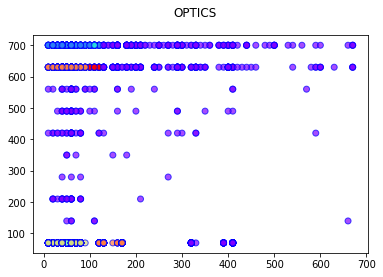

In [7]:
from optics import OPTICS

min_pts = 150
eps = 30
labels_O = OPTICS(df_Optics, eps, min_pts)

In [8]:
df_Opt = df_clean[::100].copy()
df_Opt["label"] = labels_O
df_Opt["value"] = [1 for i in range (df_Opt.shape[0])]

In [9]:
df_Opt.groupby(["discipline", "mark", "label"]).count().head(100)

value
discipline            mark             label       
актерское мастерство  лучше не бывает! 0          3
                      отлично          0          1
английский язык       более-менее      0          1
                      вполне хорошо    0          3
                      лучше не бывает! 1        118
                      отлично          5         96
                      почти отлично    0          3
                      так себе...      0          5
                      ужасно           3          4
                                       4        116
                      хорошо           0          2
арабский язык         лучше не бывает! 0          2
биология              лучше не бывает! 1          7
                      отлично          5          8
                      почти отлично    0          1
                      ужасно           2          1
                                       4         59
                      хорошо           0          1
бухгалтерский учет    лучше не бывает! 0          2
                      отлично          0          4
                      ужасно           0         32
вокал                 лучше не бывает! 0         15
                      отлично          0          7
                      почти хорошо     0          1
высшая математика     лучше не бывает! 0          1
география             отлично          0          2
                      ужасно           5        125
гитара                вполне хорошо    0          1
                      лучше не бывает! 0          5
                      отлично          0         12
...                                             ...
логопеды              плохо            0          2
                      почти отлично    0          2
макроэкономика        отлично          0          1
математика            более-менее      0          1
                      вполне хорошо    0          9
                      лучше не бывает! 1        106
                      отлично          5         99
                      плохо            0          2
                      почти отлично    0         11
                      так себе...      0          7
                      ужасно           3          1
                                       4        687
                      хорошо           0         10
математический анализ лучше не бывает! 0          5
менеджмент            отлично          0          1
микроэкономика        лучше не бывает! 0          1
музыка                лучше не бывает! 0          6
                      отлично          0          4
                      хорошо           0          1
начальная школа       вполне хорошо    0          1
                      лучше не бывает! 0         21
                      отлично          0         19
                      почти отлично    0          2
                      ужасно           5          5
не указана            лучше не бывает! 1         29
                      отлично          5         19
                      почти отлично    0          1
                      так себе...      0          3
                      ужасно           4         15
                      хорошо           0          2

[100 rows x 1 columns]

In [10]:
print(df_Opt.groupby(["discipline", "mark", "label"]).count().to_string())

                                                 value
discipline               mark             label       
актерское мастерство     лучше не бывает! 0          3
                         отлично          0          1
английский язык          более-менее      0          1
                         вполне хорошо    0          3
                         лучше не бывает! 1        118
                         отлично          5         96
                         почти отлично    0          3
                         так себе...      0          5
                         ужасно           3          4
                                          4        116
                         хорошо           0          2
арабский язык            лучше не бывает! 0          2
биология                 лучше не бывает! 1          7
                         отлично          5          8
                         почти отлично    0          1
                         ужасно           2          1
          

In [13]:
df_Optics = df.values[::100]

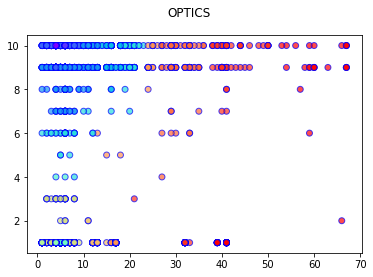

In [14]:
from optics import OPTICS

min_pts = 50
eps = 15
labels = OPTICS(df_Optics, eps, min_pts)

In [15]:
df_Optics = df.values[::55]

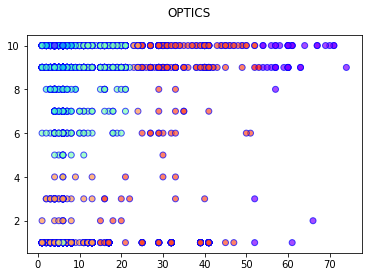

In [16]:
from optics import OPTICS

min_pts = 150
eps = 10
labels = OPTICS(df_Optics, eps, min_pts)